# Diabetes Prediction using demographic data and body measurements

# About our data

The [National Health and Nutrition Examination Survey (NHANES)](https://www.cdc.gov/Nchs/Nhanes/about_nhanes.htm) is a program of studies designed to assess the health and nutritional status of adults and children in the United States. The survey is unique in that it combines interviews and physical examinations. NHANES is a major program of the National Center for Health Statistics (NCHS). NCHS is part of the Centers for Disease Control and Prevention (CDC) and has the responsibility for producing vital and health statistics for the Nation.

The NHANES program began in the early 1960s and has been conducted as a series of surveys focusing on different population groups or health topics. In 1999, the survey became a continuous program that has a changing focus on a variety of health and nutrition measurements to meet emerging needs. The survey examines a nationally representative sample of about 5,000 persons each year. These persons are located in counties across the country, 15 of which are visited each year.

The NHANES interview includes demographic, socioeconomic, dietary, and health-related questions. The examination component consists of medical, dental, and physiological measurements, as well as laboratory tests administered by highly trained medical personnel.

To date, [thousands of research findings have been published using the NHANES data.](https://www.ncbi.nlm.nih.gov/pubmed?orig_db=PubMed&term=NHANES&cmd=search)

Content
The 2013-2014 NHANES datasets include the following components:

**1. Demographics dataset:**

A complete variable dictionary can be found [here](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Demographics&CycleBeginYear=2013)

**2. Examinations dataset, which contains:**

Blood pressure

Body measures

Muscle strength - grip test

Oral health - dentition

Taste & smell

A complete variable dictionary can be found [here](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Examination&CycleBeginYear=2013)

**3. Dietary data - total nutrient intake, first day:**

A complete variable dictionary can be found [here](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Dietary&CycleBeginYear=2013)

**4. Laboratory dataset, which includes:**

Albumin & Creatinine - Urine

Apolipoprotein B

Blood Lead, Cadmium, Total Mercury, Selenium, and Manganese

Blood mercury: inorganic, ethyl and methyl

Cholesterol - HDL

Cholesterol - LDL & Triglycerides

Cholesterol - Total

Complete Blood Count with 5-part Differential - Whole Blood

Copper, Selenium & Zinc - Serum

Fasting Questionnaire

Fluoride - Plasma

Fluoride - Water

Glycohemoglobin

Hepatitis A

Hepatitis B Surface Antibody

Hepatitis B: core antibody, surface antigen, and Hepatitis D antibody

Hepatitis C RNA (HCV-RNA) and Hepatitis C Genotype

Hepatitis E: IgG & IgM Antibodies

Herpes Simplex Virus Type-1 & Type-2

HIV Antibody Test

Human Papillomavirus (HPV) - Oral Rinse

Human Papillomavirus (HPV) DNA - Vaginal Swab: Roche Cobas & Roche Linear Array

Human Papillomavirus (HPV) DNA Results from Penile Swab Samples: Roche Linear Array

Insulin

Iodine - Urine

Perchlorate, Nitrate & Thiocyanate - Urine

Perfluoroalkyl and Polyfluoroalkyl Substances (formerly Polyfluoroalkyl Chemicals - PFC)

Personal Care and Consumer Product Chemicals and Metabolites

Phthalates and Plasticizers Metabolites - Urine

Plasma Fasting Glucose

Polycyclic Aromatic Hydrocarbons (PAH) - Urine

Standard Biochemistry Profile

Tissue Transglutaminase Assay (IgA-TTG) & IgA Endomyseal Antibody Assay (IgA EMA)

Trichomonas - Urine

Two-hour Oral Glucose Tolerance Test

Urinary Chlamydia

Urinary Mercury

Urinary Speciated Arsenics

Urinary Total Arsenic

Urine Flow Rate

Urine Metals

Urine Pregnancy Test

Vitamin B12

A complete data dictionary can be found [here](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Laboratory&CycleBeginYear=2013)

**Questionnaire dataset, which includes information on:**

Acculturation

Alcohol Use

Blood Pressure & Cholesterol

Cardiovascular Health

Consumer Behavior

Current Health Status

Dermatology

Diabetes

Diet Behavior & Nutrition

Disability

Drug Use

Early Childhood

Food Security

Health Insurance

Hepatitis

Hospital Utilization & Access to Care

Housing Characteristics

Immunization

Income

Medical Conditions

Mental Health - Depression Screener

Occupation

Oral Health

Osteoporosis

Pesticide Use

Physical Activity

Physical Functioning

Preventive Aspirin Use

Reproductive Health

Sexual Behavior

Sleep Disorders

Smoking - Cigarette Use

Smoking - Household Smokers

Smoking - Recent Tobacco Use

Smoking - Secondhand Smoke Exposure

Taste & Smell

Weight History

Weight History - Youth

A complete variable dictionary can be found [here](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Questionnaire&CycleBeginYear=2013)


# 1. Loading and Preparing Our Datasets

In [ ]:
# Load our modules
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplot

import re
import sklearn

# Ignore any warnings for cleaner output (not necessary)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df1  = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/labs.csv")
df2  = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/examination.csv")
df3  = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/demographic.csv")
df4  = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/diet.csv")
df5  = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/questionnaire.csv")

df2.drop(['SEQN'], axis = 1, inplace=True)
df3.drop(['SEQN'], axis = 1, inplace=True)
df4.drop(['SEQN'], axis = 1, inplace=True)
df5.drop(['SEQN'], axis = 1, inplace=True)

df = pd.concat([df1, df2], axis=1, join='inner')
df = pd.concat([df, df3], axis=1, join='inner')
df = pd.concat([df, df4], axis=1, join='inner')
df = pd.concat([df, df5], axis=1, join='inner')

#sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
#sel.fit_transform(df)

df.describe()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBDSBUSI,LBXSC3SI,LBXSCA,LBDSCASI,LBXSCH,LBDSCHSI,LBXSCK,LBXSCLSI,LBXSCR,LBDSCRSI,LBXSGB,LBDSGBSI,LBXSGL,LBDSGLSI,LBXSGTSI,LBXSIR,LBDSIRSI,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBDSTBSI,...,SXQ272,SXQ280,SXQ292,SXQ294,WHD010,WHD020,WHQ030,WHQ040,WHD050,WHQ060,WHQ070,WHD080A,WHD080B,WHD080C,WHD080D,WHD080E,WHD080F,WHD080G,WHD080H,WHD080I,WHD080J,WHD080K,WHD080M,WHD080N,WHD080O,WHD080P,WHD080Q,WHD080R,WHD080S,WHD080T,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
count,9813.000000,8052.000000,8052.000000,8052.000000,8052.000000,8052.000000,3329.000000,3145.000000,3145.000000,6553.000000,6553.000000,6552.000000,6551.000000,6551.000000,6553.000000,6553.000000,6553.000000,6511.000000,6511.000000,6551.000000,6551.000000,6542.000000,6553.000000,6553.000000,6553.000000,6544.000000,6544.000000,6553.000000,6553.000000,6552.000000,6527.000000,6527.000000,6552.000000,6551.000000,6553.000000,6553.000000,6552.000000,6552.000000,6549.000000,6549.000000,...,3360.00000,1622.000000,1725.000000,1835.000000,6205.000000,6196.000000,6229.000000,6229.000000,6188.000000,1190.000000,5470.000000,1631.0,860.0,781.0,1765.0,384.0,225.0,110.0,112.0,83.0,194.0,26.0,1003.0,170.0,669.0,19.0,1080.0,979.0,909.0,963.0,14.0,28.0,4036.000000,4842.000000,2667.000000,5879.000000,5800.000000,1424.000000,1424.000000,1424.000000
mean,78644.559971,41.218854,41.218854,121.072529,10702.811525,41.905695,78917.195254,85.898569,0.858986,4.282085,42.820845,78.578907,25.117845,24.069913,12.863269,4.592582,25.168167,9.486377,2.371594,184.505877,4.771333,153.986090,104.309171,0.880172,77.807255,2.826039,28.260391,102.290859,5.678097,26.081197,83.445534,14.946131,4.026923,126.801710,139.782542,279.273615,3.929405,1.268801,0.639235,10.930919,...,1.99494,1.318742,1.164638,1.276839,162.013860,255.694480,1.957136,2.237117,314.610375,1.369748,1.641133,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,31.0,32.0,33.0,34.0,30.0,41.0,42.0,43.0,44.0,45.0,46.0,35.0,40.0,413.440287,567.920074,373.831646,315.447355,574.222069,2.586376,2.295646,1.747893
std,2938.592266,238.910226,238.910226,78.574882,6946.019595,276.261093,71088.020067,25.595258,0.255953,0.343649,3.436491,51.614841,17.740698,18.484877,5.993834,2.139780,2.269895,0.367961,0.091990,41.977990,1.085560,185.262311,2.745838,0.487262,43.074036,0.441439,4.414388,38.724165,2.149616,42.896888,36.395317,6.518856,0.354320,32.064128,2.216775,5.023304,0.651231,0.210288,0.308691,5.278621,...,0.23965,0.570837,0.862079,0.945449,968.854791,872.943399,1.016842,0.636199,1150.759955,0.529461,0.500602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1511.368399,1975.492188,1716.831150,1075.040013,7288.930842,0.782529,1.210905,0.707600
min,73557.000000,0.210000,0.210000,5.000000,442.000000,0.210000,0.000000,20.000000,0.200000,2.400000,24.000000,9.000000,9.000000,6.000000,1.000000,0.360000,16.000000,7.600000,1.900000,72.000000,1.862000,6.000000,83.000000,0.290000,25.640000,1.400000,14.000000,49.000000,2.720000,4.000000,5.000000,0.900000,2.800000,38.000000,119.000000,237.000000,1.800000,0.581000,0.100000,1.710000,...,1.00000,1.000000,1.000000,1.000000,48.000000,75.000000,1.000000,1.000000,75.000000,1.000000,1.000000,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,31.0,32.0,33.0,34.0,30.0,41.0,42.0,43.0,44.0,45.0,46.0,35.0,40.0,75.000000,55.000000,50.000000,85.000000,10.000000,1.000000,1.000000,1.000000
25%,76092.000000,4.500000,4.500000,60.000000,5304.000000,5.020000,33217.405018,68.000000,0.680000,4.100000,41.000000,53.000000,19.000000,15.000000,9.000000,3.210000,24.000000,9.200000,2.300000,155.000000,4.008000,75.000000,103.000000,0.690000,61.000000,2.500000,25.000000,86.000000,4.770000,13.000000,59.000000,10.600000,3.800000,109.000000,139.000000,276.000000,3.500000,1.130000,0.400000,6.840000,...,2.00000,1.000000,1.000000,1.000000,63.000000,143.000000,1.000000,2.000000,14

In [ ]:
df.head()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBDSBUSI,LBXSC3SI,LBXSCA,LBDSCASI,LBXSCH,LBDSCHSI,LBXSCK,LBXSCLSI,LBXSCR,LBDSCRSI,LBXSGB,LBDSGBSI,LBXSGL,LBDSGLSI,LBXSGTSI,LBXSIR,LBDSIRSI,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBDSTBSI,...,SXQ272,SXQ280,SXQ292,SXQ294,WHD010,WHD020,WHQ030,WHQ040,WHD050,WHQ060,WHQ070,WHD080A,WHD080B,WHD080C,WHD080D,WHD080E,WHD080F,WHD080G,WHD080H,WHD080I,WHD080J,WHD080K,WHD080M,WHD080N,WHD080O,WHD080P,WHD080Q,WHD080R,WHD080S,WHD080T,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,41.0,129.0,16.0,16.0,10.0,3.57,27.0,9.5,2.375,168.0,4.344,174.0,97.0,1.21,106.96,2.4,24.0,554.0,30.75,16.0,58.0,10.4,4.3,118.0,136.0,296.0,4.3,1.388,0.8,13.68,...,NaN,NaN,NaN,NaN,69.0,180.0,3.0,3.0,210.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,47.0,97.0,18.0,29.0,16.0,5.71,23.0,9.2,2.300,167.0,4.319,147.0,98.0,0.79,69.84,3.1,31.0,219.0,12.16,15.0,79.0,14.1,4.3,122.0,128.0,265.0,3.9,1.259,0.9,15.39,...,2.0,1.0,1.0,NaN,71.0,200.0,3.0,3.0,160.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,37.0,99.0,22.0,16.0,14.0,5.00,23.0,8.9,2.225,127.0,3.284,44.0,105.0,1.22,107.85,2.2,22.0,183.0,10.16,13.0,98.0,17.6,4.2,134.0,142.0,288.0,4.2,1.356,0.6,10.26,...,NaN,NaN,NaN,NaN,70.0,195.0,3.0,2.0,195.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,43.0,78.0,36.0,28.0,31.0,11.07,31.0,10.0,2.500,207.0,5.353,60.0,100.0,0.73,64.53,2.8,28.0,104.0,5.77,31.0,91.0,16.3,4.1,201.0,142.0,290.0,4.4,1.421,0.5,8.55,...,NaN,NaN,NaN,NaN,67.0,120.0,2.0,1.0,150.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN


In [ ]:
df.dropna(axis=1, how='all')
df.dropna(axis=0, how='all')

df = df.rename(columns = {'SEQN' : 'ID',
                          'RIAGENDR' : 'Gender',
                          'DMDYRSUS' : 'Years_in_US', # Nan -> american i guess
                          'INDFMPIR' : 'Family_income',
                          'LBXGH' : 'GlycoHemoglobin',
                          'BMXARMC' : 'ArmCircum',
                          'BMDAVSAD' : 'SaggitalAbdominal',
                          'MGDCGSZ' : 'GripStrength',
                          'DRABF' : 'Breast_fed'})

df = df.loc[:, ['ID', 'Gender', 'Years_in_US', 'Family_income','GlycoHemoglobin', 'ArmCircum', 
                'SaggitalAbdominal', 'GripStrength', 'Breast_fed']]

df.describe()

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
count,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000
mean,78644.559971,1.509426,1.672271,2.246973,5.564201,28.528248,21.004545,62.455233,1.868949
std,2938.592266,0.499937,8.446506,1.635495,0.834491,7.753571,4.261142,22.228196,0.337473
min,73557.000000,1.000000,0.000000,0.000000,3.500000,10.400000,10.100000,8.000000,1.000000
25%,76092.000000,1.000000,0.000000,0.870000,5.300000,23.200000,18.500000,50.300000,2.000000
50%,78643.000000,2.000000,0.000000,1.700000,5.400000,29.300000,20.700000,60.300000,2.000000
75%,81191.000000,2.000000,0.000000,3.600000,5.600000,33.800000,22.900000,73.300000,2.000000
max,83731.000000,2.000000,99.000000,5.000000,17.500000,59.400000,40.100000,162.800000,2.000000


We use Glycohemoglobin to classify Diabetes 
- 0-> Normal status 
- 1-> High-risk diabetes 
- 2-> Diabetes patients


In [ ]:
from sklearn.feature_selection import VarianceThreshold

#year in us -> american : 0, not american : 1
df.dropna(axis=1, how='all')
df.dropna(axis=0, how='all')

#YEARS IN US 
df['Years_in_US'] = df['Years_in_US'].apply(lambda x: x if x > 0 else 0)

#GlycoHemoglobin, Saggital Abdominal(median)
df['GlycoHemoglobin'] = df['GlycoHemoglobin'].fillna(df['GlycoHemoglobin'].median())
#print(df['GlycoHemoglobin'])
df['SaggitalAbdominal'] = df['SaggitalAbdominal'].fillna(df['SaggitalAbdominal'].median())
df['ArmCircum'] = df['ArmCircum'].fillna(df['ArmCircum'].median())
df['GripStrength'] = df['GripStrength'].fillna(df['GripStrength'].median())

#Family Income -> use ffill to fill na
df['Family_income'] = df['Family_income'].fillna(method='ffill')

#Breat_fed -> fill to 1
df['Breast_fed'] = df['Breast_fed'].fillna(value = 1)
#print(df['Breast_fed'])

# We remove all features with low variance which leaves us with the dataframe below
# Features with a training-set variance lower than this threshold will be removed.
sel = VarianceThreshold(threshold=(0.15))
sel.fit_transform(df)

df.describe()

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
9808    2.0
9809    2.0
9810    2.0
9811    1.0
9812    2.0
Name: Breast_fed, Length: 9813, dtype: float64


,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
count,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000
mean,78644.559971,1.509426,1.672271,2.246973,5.564201,28.528248,21.004545,62.455233,1.868949,0.182921
std,2938.592266,0.499937,8.446506,1.635495,0.834491,7.753571,4.261142,22.228196,0.337473,0.522102
min,73557.000000,1.000000,0.000000,0.000000,3.500000,10.400000,10.100000,8.000000,1.000000,0.000000
25%,76092.000000,1.000000,0.000000,0.870000,5.300000,23.200000,18.500000,50.300000,2.000000,0.000000
50%,78643.000000,2.000000,0.000000,1.700000,5.400000,29.300000,20.700000,60.300000,2.000000,0.000000
75%,81191.000000,2.000000,0.000000,3.600000,5.600000,33.800000,22.900000,73.300000,2.000000,0.000000
max,83731.000000,2.000000,99.000000,5.000000,17.500000,59.400000,40.100000,162.800000,2.000000,2.000000


In [ ]:
df.loc[df['GlycoHemoglobin'] < 6.0, 'Diabetes'] = 0
df.loc[(df['GlycoHemoglobin'] >= 6.0) & (df['GlycoHemoglobin'] <= 6.4), 'Diabetes'] = 1
df.loc[df['GlycoHemoglobin'] >= 6.5, 'Diabetes'] = 2

df.head(10)

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
0,73557,1,0.0,0.84,13.9,35.3,20.6,55.2,2.0,2.0
1,73558,1,0.0,1.78,9.1,34.7,24.4,61.5,2.0,2.0
2,73559,1,0.0,4.51,8.9,33.5,25.6,91.0,2.0,2.0
3,73560,1,0.0,2.52,5.4,21.0,14.9,32.2,2.0,0.0
4,73561,2,0.0,5.00,4.9,25.2,20.7,30.9,2.0,0.0
5,73562,1,0.0,4.79,5.5,41.8,29.1,53.1,2.0,0.0
6,73563,1,0.0,5.00,5.4,14.9,20.7,60.3,1.0,0.0
7,73564,2,0.0,5.00,5.5,38.0,26.7,45.9,2.0,0.0
8,73566,1,0.0,5.00,5.4,29.0,19.9,38.8,2.0,0.0
9,73567,2,0.0,0.48,5.2,27.5,20.0,43.5,2.0,0.0


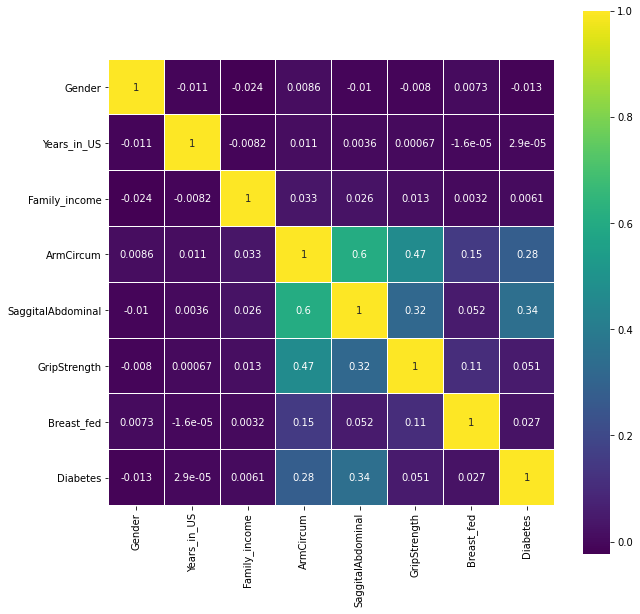

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(df.astype(float).drop(axis=1, labels='ID').corr(), linewidths=0.1, vmax=1, square=True, cmap=colormap, annot=True)

# 2. Creating our Model

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

### Using a simple Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

#data -> attributes, target -> diabetes
data = df.drop(['Diabetes'], axis=1)
target = df[['Diabetes']]

#seperate training set and test set
train_X = data[:6000]
test_X = data[6000:]
train_Y = target[:6000]
test_Y = target[6000:]

#create linear regression obj
lr_regr = LinearRegression()

#training via linear regression model
lr_regr.fit(train_X, train_Y)

#make prediction using the test set
lr_pred_diabetes = lr_regr.predict(test_X)
lr_score = lr_regr.score(test_X, test_Y)

print('LRr_Coefficients: ', lr_regr.coef_)
print('LR_Mean Square Error: %.2f' % mean_squared_error(test_Y, lr_pred_diabetes))
print('LR_Variance score: %.2f' % r2_score(test_Y, lr_pred_diabetes))
print('Score: %.2f' % lr_regr.score(test_X, test_Y))

LRr_Coefficients:  [[ 1.98953563e-06 -2.46852260e-02 -9.10149905e-04 -5.26378493e-03
   1.12229802e-02  3.57806364e-02 -3.02433944e-03  1.73096160e-03]]
LR_Mean Square Error: 0.23
LR_Variance score: 0.12
Score: 0.12


In [ ]:
#test data 
lr_pred_diabetes
#len(lr_pred_diabetes)

array([[0.17610814],
       [0.06915668],
       [0.1792808 ],
       ...,
       [0.46134257],
       [0.19766727],
       [0.09884146]])



### Let's now treat it as a Classification Problem

Using Adaboost with Decision Tree classifiers

![](https://ars.els-cdn.com/content/image/3-s2.0-B9780128177365000090-f09-18-9780128177365.jpg)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#create adaboost classification obj
ab_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, 
                            learning_rate=0.5, random_state=100)

#training via adaboost classficiation model
ab_clf.fit(train_X, train_Y)
print("training....\n")

#make prediction using the test set
ab_pred_diabetes = ab_clf.predict(test_X)
print('prediction: \n', ab_pred_diabetes)

print('\nparms: \n', ab_clf.get_params)

#score
ab_clf_score = ab_clf.score(test_X, test_Y)
print("\nmean accuracy: %.2f" % ab_clf.score(test_X, test_Y))

training....

prediction: 
 [0. 0. 0. ... 0. 0. 0.]

parms: 
 <bound method BaseEstimator.get_params of AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0

# 3. Improving Performance 
### We can do better, let's try Bagging some Decission Tree and KNeighbor Classifiers

![](https://vitalflux.com/wp-content/uploads/2020/09/Screenshot-2020-09-08-at-4.17.30-PM.png)

### Bagging Decision Trees Classifiers

In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator= DecisionTreeClassifier(), max_samples = 0.5, max_features = 0.5, 
                            bootstrap = False, bootstrap_features = False)

bagging.fit(train_X, train_Y)
bg_pred_diabetes = bagging.predict(test_X)

bg_dt_score = bagging.score(test_X, test_Y)
bagging.score(test_X, test_Y)

0.8756884343036979

### Bagging Decision Trees KNeighbor Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

bagging = BaggingClassifier(base_estimator= KNeighborsClassifier(), max_samples = 0.5, max_features = 0.5, 
                            bootstrap = False, bootstrap_features = False)

bagging.fit(train_X, train_Y)
bg_pred_diabetes = bagging.predict(test_X)

bg_score = bagging.score(test_X, test_Y)
bagging.score(test_X, test_Y)

0.8806713873590348

### XGBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

xgboost = GradientBoostingClassifier(random_state=0)
xgboost.fit(train_X, train_Y)

xgboost_score = xgboost.score(test_X, test_Y)
xgboost_score

0.8730658274324679

### Can we do better with a Neural Network?

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(1000, 300, 300), solver='adam', shuffle=False, tol = 0.0001)

mlp.fit(train_X, train_Y)
mlp_pred_diabetes = mlp.predict(test_X)

print("parameter: ", mlp.get_params())

mlp_score = mlp.score(test_X, test_Y)
#print(mlp_score)
mlp.score(test_X, test_Y)

parameter:  {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (1000, 300, 300), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': False, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


0.8806713873590348

In [ ]:
test_X

,ID,Gender,Years_in_US,Family_income,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
6000,79781,2,0.0,1.55,18.9,20.7,26.4,2.0
6001,79782,1,0.0,3.17,26.5,17.8,61.0,2.0
6002,79783,2,5.0,2.78,29.3,20.7,60.3,2.0
6003,79784,2,5.0,4.19,22.7,16.8,67.5,2.0
6004,79785,2,4.0,5.00,24.9,16.0,37.6,2.0
...,...,...,...,...,...,...,...,...
9808,83727,2,4.0,1.25,29.9,19.1,70.1,2.0
9809,83728,1,0.0,1.06,14.7,20.7,60.3,2.0
9810,83729,1,0.0,5.00,37.0,24.3,46.6,2.0
9811,83730,2,3.0,1.53,19.0,20.7,20.8,1.0


### Summarizing Performance of our Models

In [ ]:
d = {'Model': ['Linear Regression', 'Adaboost', 'Bagging_decision tree based', 'Bagging_KNeighbors', 'XGBoost', 'MLP'],
     'accuracy%' : [lr_score * 100, ab_clf_score *100, bg_dt_score *100 , bg_score *100, xgboost_score *100, mlp_score *100], 
     }

result_df = pd.DataFrame(data = d)
result_df = result_df.sort_values(by="accuracy%", ascending=True)
result_df

,Model,accuracy%
0,Linear Regression,12.094791
1,Adaboost,70.416994
4,XGBoost,87.306583
2,Bagging_decision tree based,87.568843
3,Bagging_KNeighbors,88.067139
5,MLP,88.067139


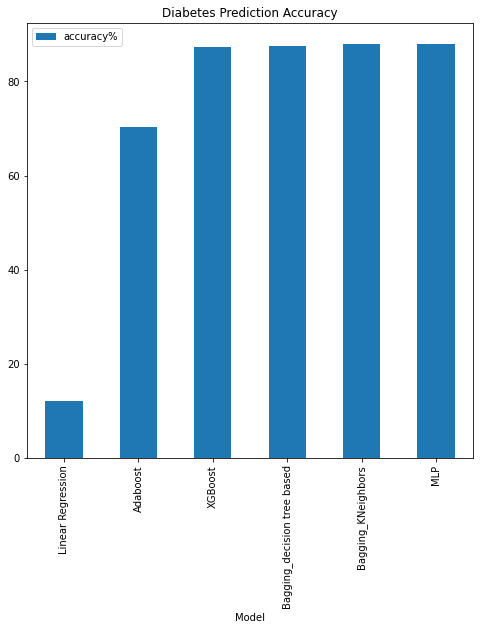

In [ ]:
result_df.plot(x='Model', y='accuracy%', kind='bar', figsize=(8,8), title='Diabetes Prediction Accuracy', 
               sort_columns=True)